In [1]:
np.std(x)

NameError: name 'np' is not defined

In [ ]:
from raster import raster
# INPUTS
# fileloc = location of point cloud
# saveloc = folder for outputs
# mask = denotes whether file is a mask image. mask = 1 skips rasterisation step and resizes to match image dimensions.
# res = multiplier on resolution of rasterised point cloud imagedimension = defaultdimension*res
# dim = if given, resulting image is cropped into dimxdim images and put into relevant mask or image folder ready for network training. 

# INPUT FILES
# if mask = 0, pointcloud or .tiff format image at location: fileloc
# if mask = 1, mask at location: saveloc+"mask.tiff" 
# if mask = 1, image at location: saveloc+ "raster.tiff"

# OUTPUTS
# noim = number of images created

# OUTPUT FILES
# if mask = 0 and input is point cloud, rastered image at location: saveloc+ "raster.tiff"
# if mask = 0 and input is an image, rastered image at location: saveloc+ "raster.tiff"
# if mask = 1, resized mask at location: saveloc+"mask.tiff"
# if dim exists and mask = 0, new folder (if not exists): 'croppedimages/'
# if dim exists and mask = 1, new folder (if not exists): 'croppedmasks/'
# if dim exists and mask = 0, numbered image crops of size dimxdim at location: saveloc+croppedimages/+ str(i) +".tiff"
# if dim exists and mask = 1, numbered mask crops of size dimxdim at location: saveloc+croppedmasks/+ str(i) +".tiff"
fileloc = "../../Incoming data/MartyrWorthy_3mm-flat - Cloud.las"
saveloc = "../dataprep/"
mask = 0
res = 1
dim = None
raster(fileloc,saveloc)

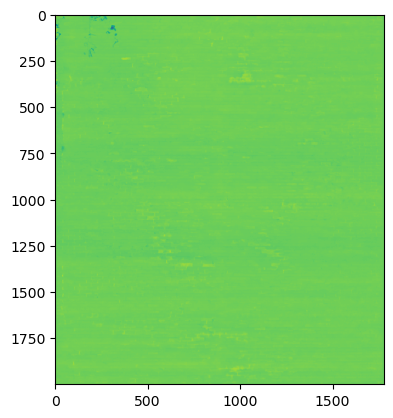

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

#im = Image.open("../data/synth/synthetic_defect_wall3.tiff")
im = Image.open("../dataprep/raster.tiff")
imnp = np.array(im)
#im = cv.imread("synth/synthetic_defect_wall4.tiff")
plt.imshow(imnp[1000:3000,:])

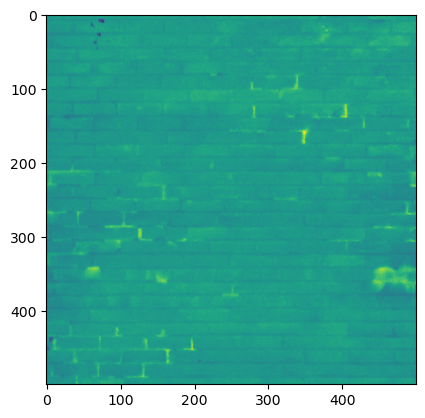

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

#im = Image.open("../data/synth/synthetic_defect_wall3.tiff")
im = Image.open("../dataprep/crops/10.tiff")
im2 = Image.open("../dataprep/crops/10.png")
imnp = np.array(im)
#im = cv.imread("synth/synthetic_defect_wall4.tiff")
plt.imshow(imnp)

In [15]:
box = (0, 0, 200, 200)
region = im.crop(box)
region2 = im2.crop(box)
region.save('../data/test2.tiff')
region2.save('../data/testmask2.png')

In [1]:
from raster import raster
#raster("../data/testmask2.tiff","../data/",mask = 0,res = 5,dim = None)

raster("../data/mask3.tiff","../data/",mask = 0,res = 10,dim = None)

0

In [2]:
from PIL import Image
im4 =Image.open("../data/raster.tiff")
im4.save("../data/mask3.tiff")

In [ ]:
dim = 500
pic = im
#pic = ImageOps.grayscale(pic)
w = pic.size[0]
nx = int(w/dim)
h = pic.size[1]
ny = int(h/dim)
i = 0
print("cropping masks")
for x in range(0, nx):
    for y in range(0, ny):
      i = i+1
      box = (x*dim, y*dim, dim*(1+x) , dim*(1+y))
      region = pic.crop(box)
      #region.save("test2/croppedimagestargetfullres2/"+ str(i) +".png")
      region.save("../dataprep/crops/"+ str(i) +".tiff")
      regionnp = np.array(region)
      import matplotlib.pyplot as plt

    # Get the color map by name:
      cm = plt.get_cmap('gist_rainbow')
      regionnp = (regionnp-regionnp.min())/(regionnp.max()-regionnp.min())
      sd = np.std(regionnp)
      regionnp[regionnp > 8*sd+np.median(regionnp)] = 8*sd+np.median(regionnp)
      print(sd)
      print(np.max(regionnp)-np.min(regionnp))  
      regionnp[regionnp < np.median(regionnp)-8*sd] = np.median(regionnp)-8*sd
      regionnp = (regionnp-regionnp.min())/(regionnp.max()-regionnp.min())
    # Apply the colormap like a function to any array:
      #colored_image = cm(regionnp)

    # Obtain a 4-channel image (R,G,B,A) in float [0, 1]
    # But we want to convert to RGB in uint8 and save it:
     # Image.fromarray((colored_image[:, :, :3] * 255).astype(np.uint8)).save("../dataprep/crops/"+ str(i) +".png")
      Image.fromarray((regionnp * 255).astype(np.uint8)).save("../dataprep/crops/"+ str(i) +".png")
    

In [15]:

im2 = Image.open("../dataprep/crops/6.png")
im = Image.open("../data/mask.png")

source = im2.split()

R, G, B = 0, 1, 2


maskG = source[R].point(lambda i: i > 200 )


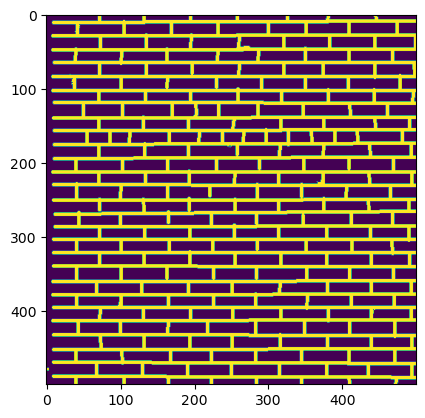

In [16]:
plt.imshow(maskG)

In [17]:
nx,ny = im2.size
im = im.resize((nx,ny))
im.paste(maskG)


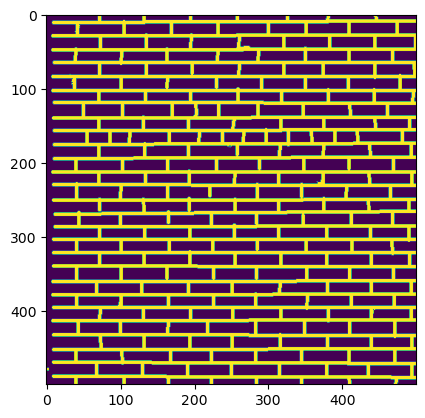

In [18]:
plt.imshow(im)

In [19]:
imnp =np.array(im)

In [20]:
imnp

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
image = Image.fromarray(imnp*255)
image.save("../data/mask3.tiff")

In [53]:
image.save("../data/testmask2.tiff")

In [57]:
im3 = Image.open("../data/test2.tiff")
imnp2 =np.array(im3)


In [58]:
imnp2

array([[405.55554, 404.55554, 404.8889 , ..., 405.55554, 406.55554,
        406.22223],
       [405.30554, 405.05554, 403.55554, ..., 407.55554, 406.22223,
        407.05554],
       [405.55554, 406.05554, 405.55554, ..., 405.55554, 407.55554,
        406.8889 ],
       ...,
       [405.22223, 403.8889 , 404.55554, ..., 406.05554, 406.05554,
        407.05554],
       [404.05554, 403.05554, 402.55554, ..., 406.3264 , 406.05554,
        404.55554],
       [402.22223, 402.8889 , 401.55554, ..., 406.8889 , 406.55554,
        406.22223]], dtype=float32)

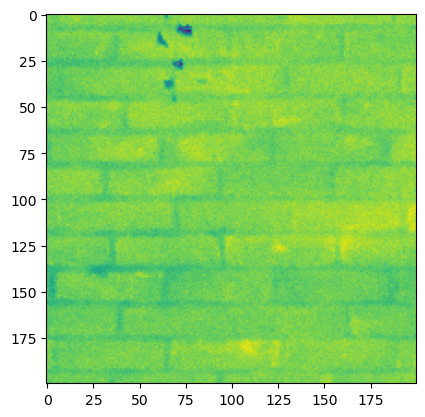

In [61]:
plt.imshow(imnp2)

In [ ]:
#combine images
